In [37]:
import tensorflow as tf
from PIL import Image
from IPython.display import display # to display images
from io import BytesIO




def read_tfrecord(filename):
    filenames = [filename]
    raw_dataset = tf.data.TFRecordDataset(filenames)
    return (
        raw_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        #.apply(tf.data.experimental.ignore_errors())
    )


feature_description = {
    "image_name": tf.io.FixedLenFeature([], tf.string),
    "image": tf.io.FixedLenFeature([], tf.string),
    "height": tf.io.FixedLenFeature([], tf.int64),
    "width": tf.io.FixedLenFeature([], tf.int64),
    "captions": tf.io.VarLenFeature(tf.string),
}


def _parse_function(example_proto):
    return tf.io.parse_single_example(example_proto, feature_description)



def main_reader(tfrecord_path="output_folder"):
    tfrecords = [
        f.numpy().decode("utf-8") for f in tf.data.Dataset.list_files(tfrecord_path + "/*.tfrecord", shuffle=False)
    ]
    
    dataset = read_tfrecord(tfrecords)
    
    for a in dataset:
        print(a['image_name'].numpy())
        print(a['height'].numpy())
        print(a['width'].numpy())
        print(tf.sparse.to_dense(a['captions']).numpy())
        image = Image.open(BytesIO(a['image'].numpy()))
        display(image)

        break
    

b'154048'
750
1097
[b'Here you see an image that contains long sleeve top.'
 b'An image that contains long sleeve top.'
 b'Here you see a long sleeve top' b'This is a long sleeve top'
 b'Here you see a long sleeve top' b'long sleeve top'
 b'Here you see an image that contains skirt.'
 b'An image that contains skirt.' b'Here you see a skirt'
 b'This is a skirt' b'Here you see a skirt' b'skirt']


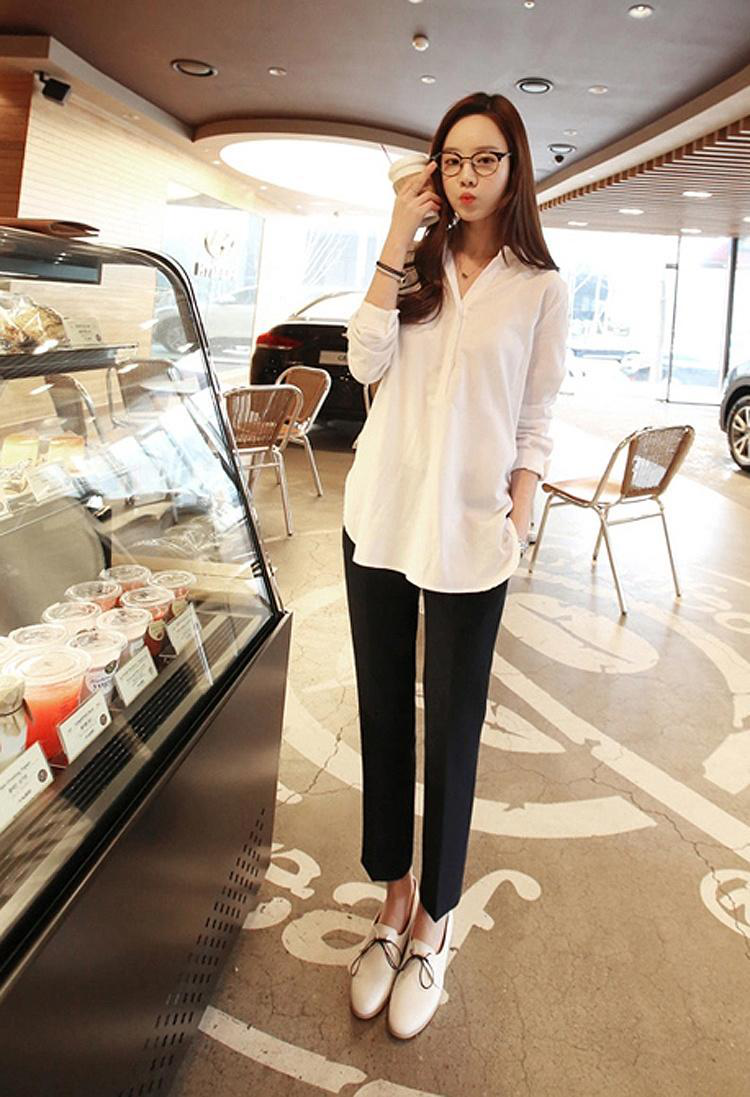

In [38]:
main_reader()